In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/dimensionality_reduction/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [23]:
latent_dim = 2

In [24]:
input_dim = X_train.shape[1]

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=latent_dim, activation='linear', name='encoded'),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=input_dim, activation='linear', name='decoded')
])

In [26]:
model.compile(optimizer='adam', loss='mse')

In [27]:
history = model.fit(X_train, X_train, batch_size=128, epochs=30, verbose=1, validation_split=0.1)

Epoch 1/30
1603/1603 [==============================] - 6s 3ms/step - loss: 23.1316 - val_loss: 1.3574
Epoch 2/30
1603/1603 [==============================] - 5s 3ms/step - loss: 14.2427 - val_loss: 0.8378
Epoch 3/30
1603/1603 [==============================] - 4s 3ms/step - loss: 2.9013 - val_loss: 0.7099
Epoch 4/30
1603/1603 [==============================] - 4s 3ms/step - loss: 3.8117 - val_loss: 0.8293
Epoch 5/30
1603/1603 [==============================] - 4s 3ms/step - loss: 4.0694 - val_loss: 1.0131
Epoch 6/30
1603/1603 [==============================] - 4s 3ms/step - loss: 9.5774 - val_loss: 0.7419
Epoch 7/30
1603/1603 [==============================] - 5s 3ms/step - loss: 3.2749 - val_loss: 2.2673
Epoch 8/30
1603/1603 [==============================] - 4s 3ms/step - loss: 8.1802 - val_loss: 0.9677
Epoch 9/30
1603/1603 [==============================] - 4s 3ms/step - loss: 1.8632 - val_loss: 0.6712
Epoch 10/30
1603/1603 [==============================] - 4s 3ms/step - loss: 4.4

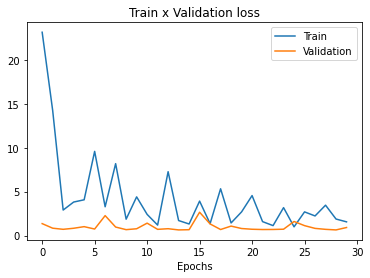

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.title('Train x Validation loss')
plt.xlabel('Epochs');

In [29]:
encoder = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(name='encoded').output)
X_test_encoded = encoder.predict(X_test)

In [30]:
X_test_encoded

array([[ 2.5354676,  4.3161225],
       [ 1.083026 ,  0.9410671],
       [ 2.2247515, 17.630075 ],
       ...,
       [ 1.5922842,  2.5672965],
       [-2.4233823,  2.962225 ],
       [-0.7206447, 13.3460045]], dtype=float32)

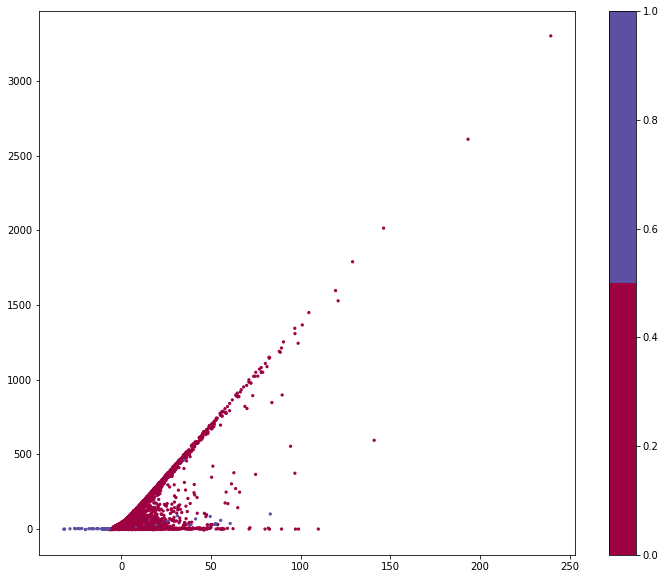

In [39]:
plt.figure(figsize=(12,10))
plt.scatter(X_test_encoded[:, 0], X_test_encoded[:, 1], c=y_test, cmap=plt.cm.get_cmap(name='Spectral', lut=2), s=5)
plt.colorbar();